# Postprocessing

The Isoforce data is recorded using three different channels named:

- **P** $\rightarrow \quad \text{Position}$ `AI0`
- **T** $\rightarrow \quad \text{Torque}$ `AI1`
- **S** $\rightarrow \quad \text{Speed}$ `AI2`

During the postprocessing, the global parameter name is used as follows with the corresponding class.

- **P** $\rightarrow \quad \text{Angle}$ `AI0` $\rightarrow$ `IsoforceIso.angle` colored in red (C3)
- **T** $\rightarrow \quad \text{Torque}$ `AI1` $\rightarrow$ `IsoforceIso.torque` colored in blue (C0)
- **S** $\rightarrow \quad \text{Speed}$ `AI2` $\rightarrow$ `IsoforceIso.speed` colored in yellow (C8)

**Set data path**

In [1]:
path = "measurements/Participant_test1/"

## Start postprocessing

- `isoforce_iso` contains the data recorded with the Isoforce
- `isoforce_py_raw` contains the Isoforce data recorded with the Python script
- `sciospec_EIT_raw` contains the EIT data recorded with the EIT device

In [2]:
import os
from glob import glob
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import numpy as np

from src.postprocessing import (
    IsoforceIso,
    ProcessingDir,
    process_sciospec_eit,
    renderDF,
    scale_to_range,
)

In [3]:
part_path = ProcessingDir(path)

Fund participant data:

Head directory: self.path='measurements/Participant_test1/'
Raw Isoforce data measured by Isoforce:
	self.isoforce_iso='measurements/Participant_test1/Test_1_JO_raw_data_10012025154959.txt'
Raw Isoforce data measured by Python:
	self.isoforce_py_raw='measurements/Participant_test1/Isokinetic_raw/'
Raw sciospec EIT data:
	self.sciospec_EIT_raw='measurements/Participant_test1/EIT_raw/'
Raw sciospec EIT samples:
	self.EIT_samples_raw='measurements/Participant_test1/EIT_raw/20250113 09.24.18/setup/'
Preprocessed sciospec EIT samples:
	self.s_path_eit='measurements/Participant_test1/EIT_processed/'


In [4]:
DF = renderDF(part_path.isoforce_iso)

!!!The torque data is lowpass filtered!!!
!!!The angle data is lowpass filtered!!!


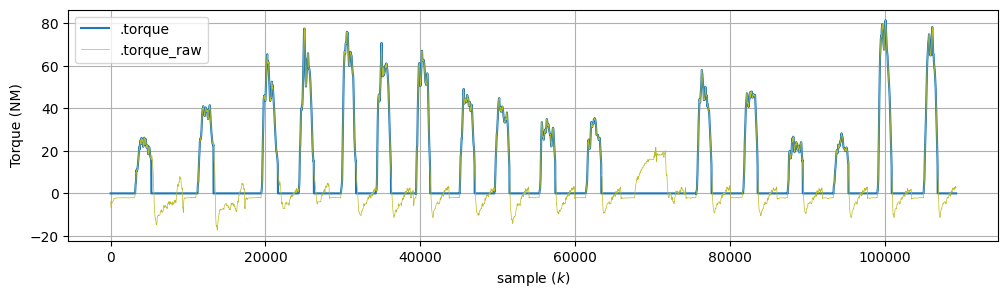

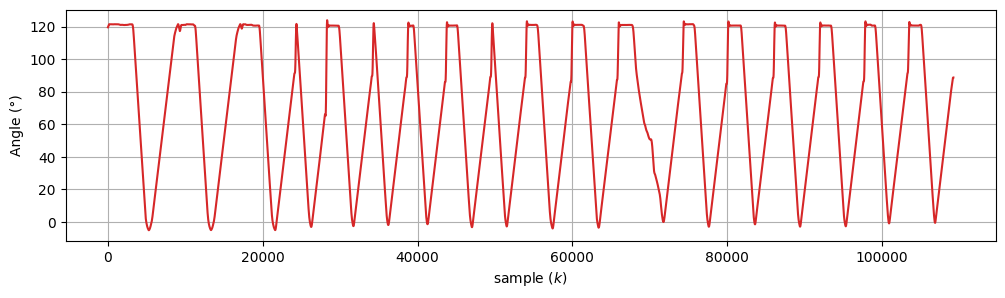

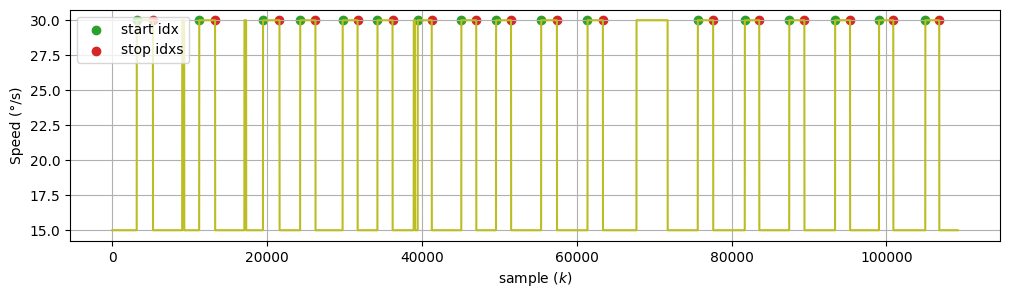

In [5]:
isoforce_iso = IsoforceIso(DF, LP_filter=True)
isoforce_iso.plot_torque()
isoforce_iso.plot_angle()
isoforce_iso.plot_speed()

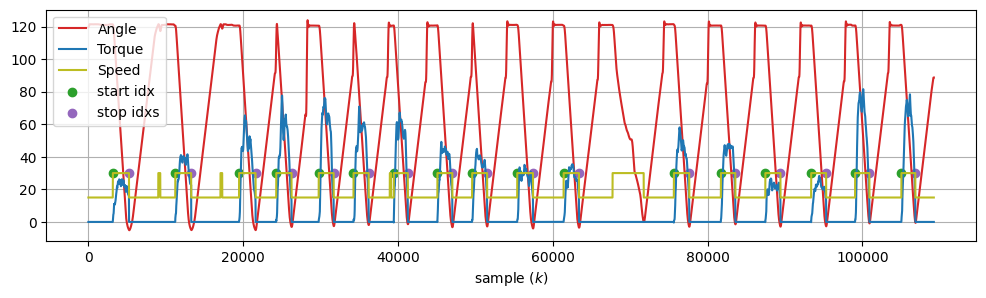

In [6]:
isoforce_iso.plot_data()

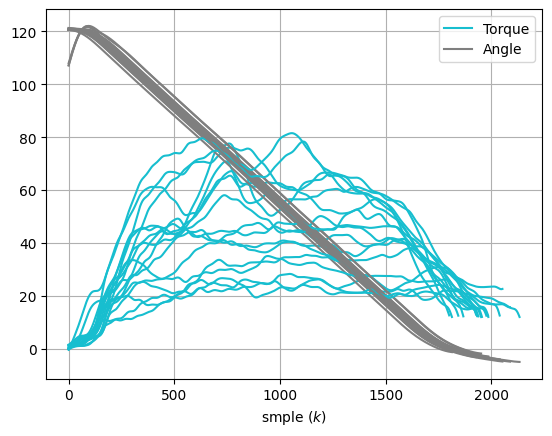

In [7]:
for idx in range(len(isoforce_iso.torque_segments.keys())):
    plt.plot(isoforce_iso.torque_segments[f"T_seg_{idx}"], "C9")
    plt.plot(isoforce_iso.angle_segments[f"A_seg_{idx}"], "C7")
plt.grid()
plt.legend(["Torque", "Angle"])
plt.xlabel("smple ($k$)")
plt.show()

**Isoforce Python raw**

- Ch_1, P = Angle = red (C3) {Factor = 54, Offset = 12}
- Ch_2, T = Torque = blue (C0) {Factor = 150, Offset = 24}
- Ch_3, S = Speed = yellow (C8) {Factor = 108, Offset = -4}

In [8]:
part_path.isoforce_py_raw

'measurements/Participant_test1/Isokinetic_raw/'

In [9]:
from src.postprocessing import IsoforcePy

In [10]:
isoforce_py = IsoforcePy(
    part_path.isoforce_py_raw,
    LP_filter=True,
    over_UTC=False,
    scale_0_1=True,
    phase_shift=50,
)

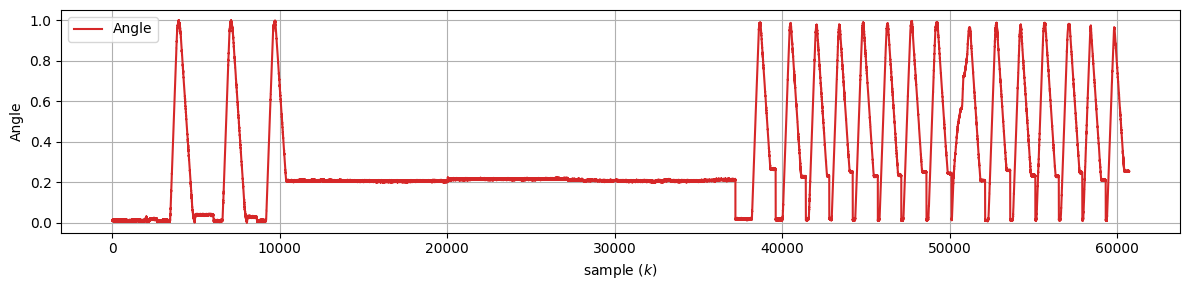

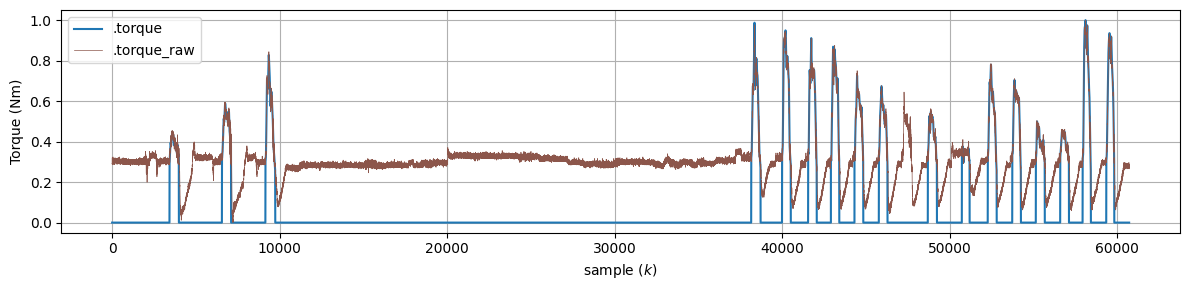

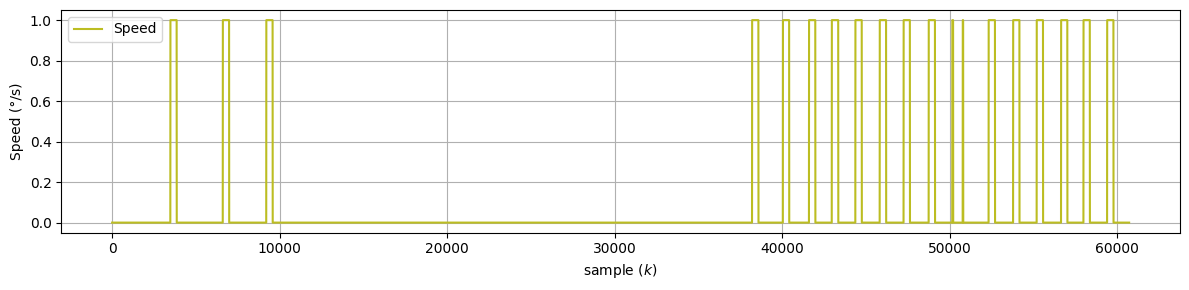

In [11]:
isoforce_py.plot_angle()
isoforce_py.plot_torque()
isoforce_py.plot_speed()

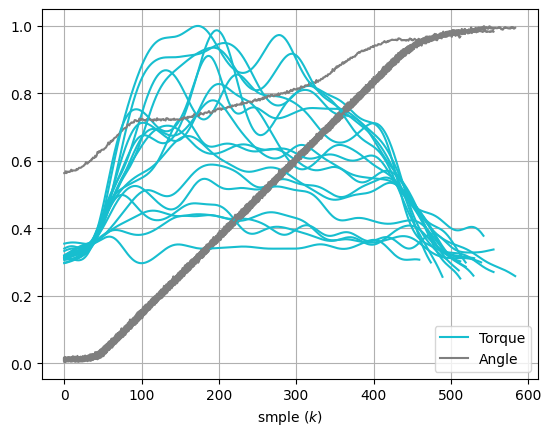

In [12]:
for idx in range(len(isoforce_py.torque_segments.keys())):
    plt.plot(isoforce_py.torque_segments[f"T_seg_{idx}"], "C9")
    plt.plot(isoforce_py.angle_segments[f"A_seg_{idx}"], "C7")
plt.grid()
plt.legend(["Torque", "Angle"])
plt.xlabel("smple ($k$)")
plt.show()

**Sync `isoforce_iso` with `isoforce_py`**

In [13]:
len(isoforce_iso.torque_segments.keys()), len(isoforce_py.torque_segments.keys())

(17, 17)

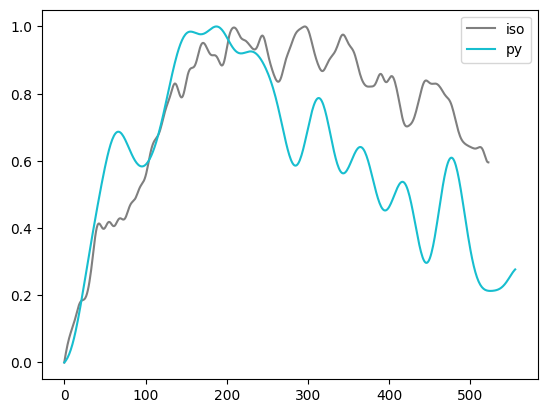

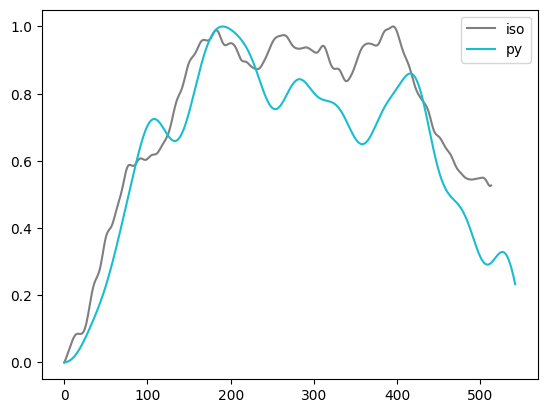

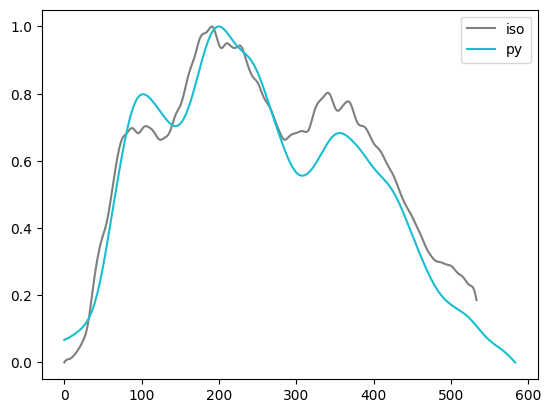

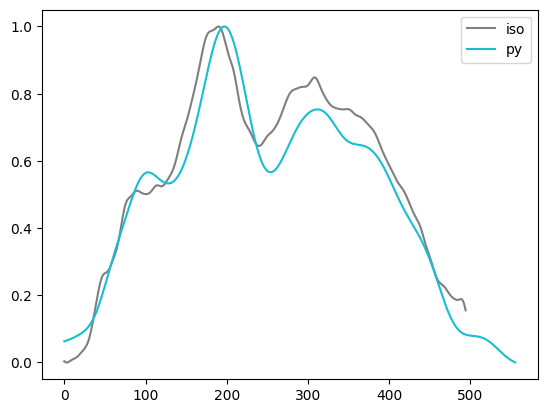

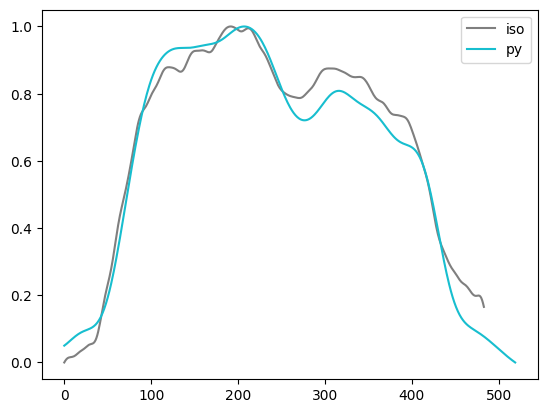

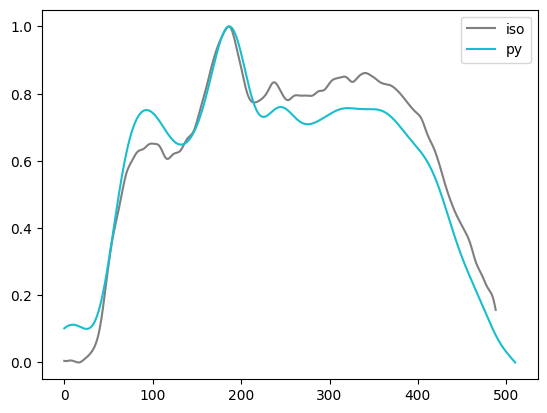

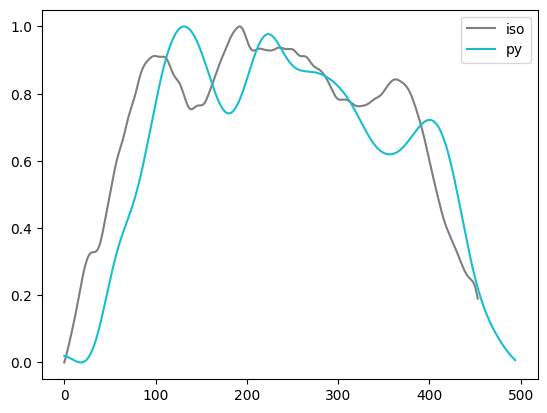

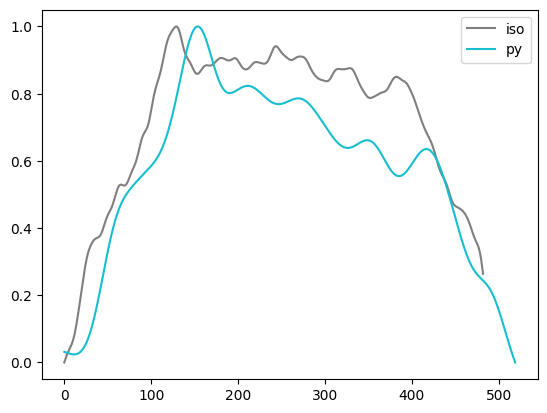

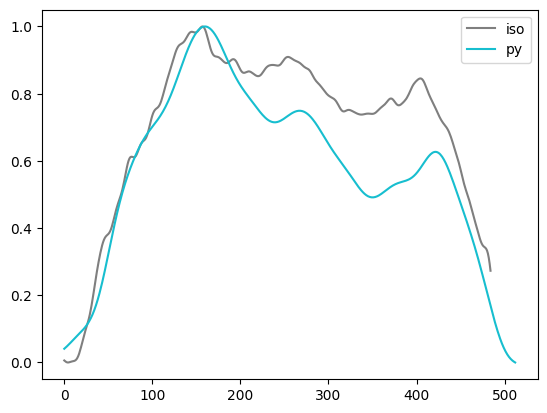

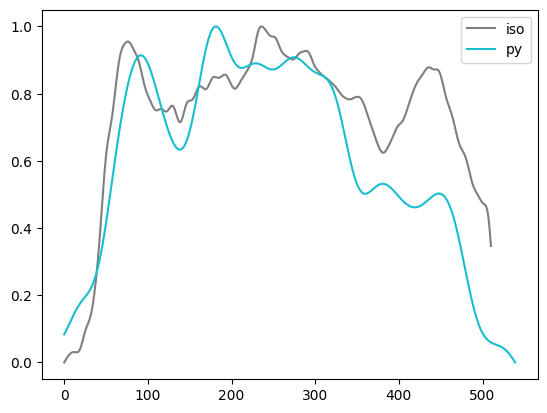

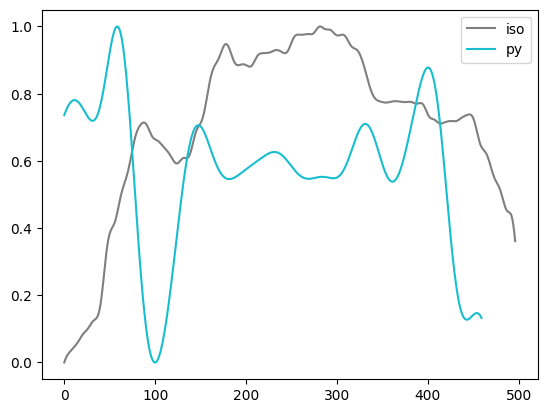

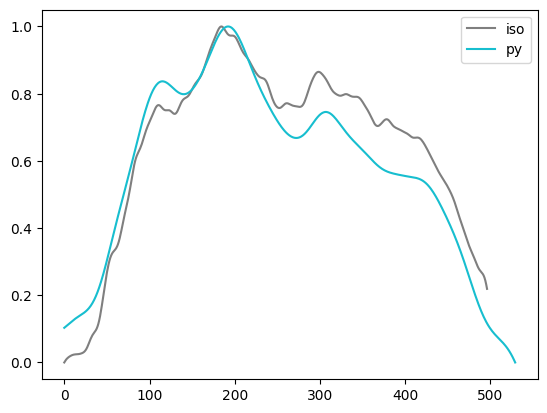

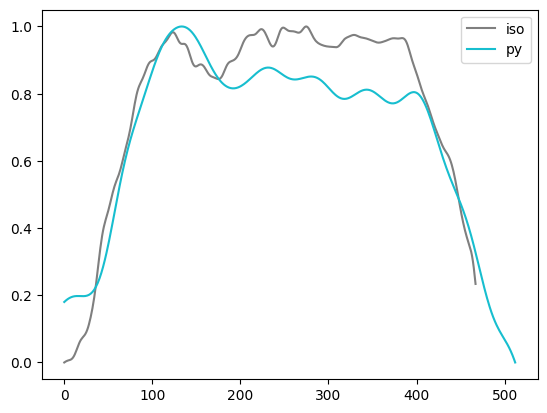

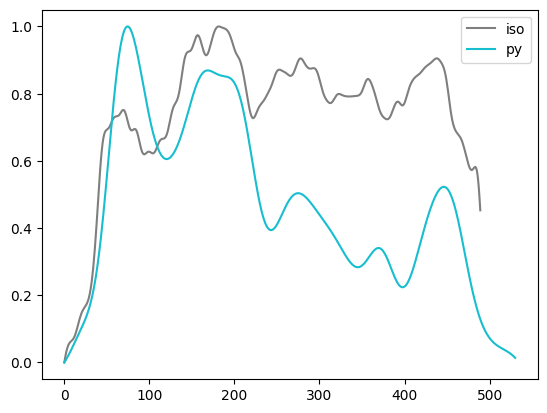

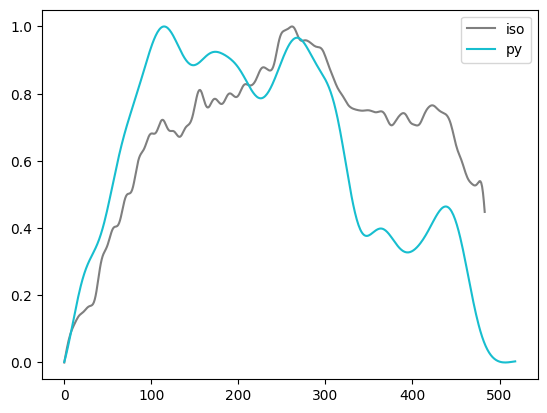

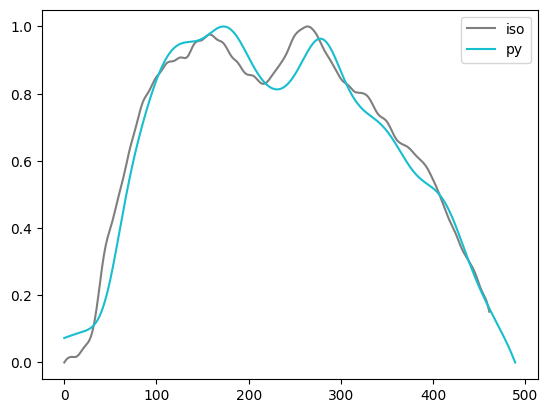

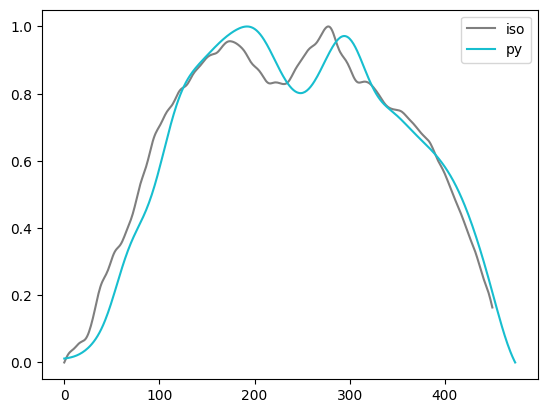

In [14]:
for idx in range(
    min(
        len(isoforce_iso.torque_segments.keys()),
        len(isoforce_py.torque_segments.keys()),
    )
):
    iso_seg = scale_to_range(isoforce_iso.torque_segments[f"T_seg_{idx}"][::4])
    py_seg = scale_to_range(isoforce_py.torque_segments[f"T_seg_{idx}"])

    # plt.plot(np.correlate(iso_seg,py_seg))
    # plt.show()
    plt.plot(iso_seg, "C7", label="iso")
    plt.plot(py_seg, "C9", label="py")
    plt.legend()
    plt.show()

In [20]:
for start, stop in zip(isoforce_py.start_idxs, isoforce_py.stop_idxs):
    print("from", isoforce_py.time[start], "to", isoforce_py.time[stop])
    print("Δt", isoforce_py.time[stop] - isoforce_py.time[start])

from 2025-01-13 09:24:39.230000 to 2025-01-13 09:24:44.790000
Δt 0:00:05.560000
from 2025-01-13 09:25:10.520000 to 2025-01-13 09:25:15.950000
Δt 0:00:05.430000
from 2025-01-13 09:25:36.470000 to 2025-01-13 09:25:42.310000
Δt 0:00:05.840000
from 2025-01-13 09:30:59.410000 to 2025-01-13 09:31:04.970000
Δt 0:00:05.560000
from 2025-01-13 09:31:48.800000 to 2025-01-13 09:31:54
Δt 0:00:05.200000
from 2025-01-13 09:32:37.380000 to 2025-01-13 09:32:42.490000
Δt 0:00:05.110000
from 2025-01-13 09:33:24.990000 to 2025-01-13 09:33:29.940000
Δt 0:00:04.950000
from 2025-01-13 09:34:14.060000 to 2025-01-13 09:34:19.260000
Δt 0:00:05.200000
from 2025-01-13 09:34:58.590000 to 2025-01-13 09:35:03.720000
Δt 0:00:05.130000
from 2025-01-13 09:36:38.820000 to 2025-01-13 09:36:44.220000
Δt 0:00:05.400000
from 2025-01-13 09:37:40.130000 to 2025-01-13 09:37:44.730000
Δt 0:00:04.600000
from 2025-01-13 09:39:14.590000 to 2025-01-13 09:39:19.890000
Δt 0:00:05.300000
from 2025-01-13 09:40:01.210000 to 2025-01-13 0

**EIT Sciospec raw**

In [16]:
part_path.print_info()

Fund participant data:

Head directory: self.path='measurements/Participant_test1/'
Raw Isoforce data measured by Isoforce:
	self.isoforce_iso='measurements/Participant_test1/Test_1_JO_raw_data_10012025154959.txt'
Raw Isoforce data measured by Python:
	self.isoforce_py_raw='measurements/Participant_test1/Isokinetic_raw/'
Raw sciospec EIT data:
	self.sciospec_EIT_raw='measurements/Participant_test1/EIT_raw/'
Raw sciospec EIT samples:
	self.EIT_samples_raw='measurements/Participant_test1/EIT_raw/20250113 09.24.18/setup/'
Preprocessed sciospec EIT samples:
	self.s_path_eit='measurements/Participant_test1/EIT_processed/'


In [17]:
try:
    os.mkdir(part_path.s_path_eit)
    process_sciospec_eit(part_path)
except BaseException:
    print("Directory already exists.")

Directory already exists.


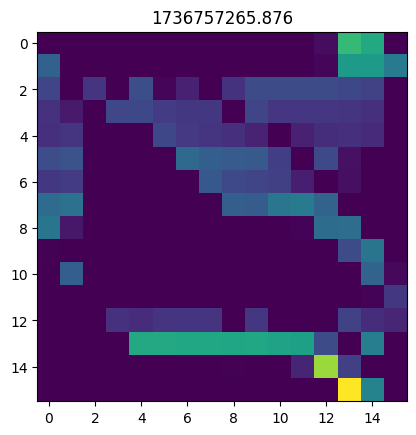

In [18]:
tmp = np.load(part_path.s_path_eit + "setup_00002.npz", allow_pickle=True)
tmp_2 = np.load(part_path.s_path_eit + "setup_00003.npz", allow_pickle=True)
tmp.files

plt.title(tmp["timestamp"])
plt.imshow(np.abs(tmp["eit"]))
plt.show()